<a href="https://colab.research.google.com/github/irinamilova/Tennis-project/blob/main/tennis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading a file + libraries + Descriptive statistics and data cleanup

Ячейка 1: Импорт библиотек


In [61]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

# Устанавливаем стиль для будущих графиков (используем встроенный стиль или seaborn)
plt.style.use('seaborn-v0_8')  # Исправленный стиль, совместимый с новыми версиями
%matplotlib inline

# Выводим сообщение об успешном импорте
print("Библиотеки успешно импортированы")

Библиотеки успешно импортированы


Ячейка 2: Загрузка датасета без строгих типов и проверка некорректных значений

In [62]:
# Загрузка датасета
df = pd.read_csv('tennis_data.csv', parse_dates=['Date'])

# Определяем столбцы, которые должны быть числовыми
numeric_cols = ['WRank', 'LRank', 'WPts', 'LPts', 'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5',
                'Wsets', 'Lsets', 'B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL', 'AvgW', 'AvgL', 'EXW', 'EXL',
                'LBW', 'LBL', 'SJW', 'SJL', 'UBW', 'UBL', 'pl1_weight', 'pl1_height', 'pl1_year_pro',
                'pl2_weight', 'pl2_height', 'pl2_year_pro']

# Проверяем каждый числовой столбец на наличие некорректных значений
print("=== Проверка числовых столбцов на некорректные значения ===")
for col in numeric_cols:
    # Проверяем, есть ли строки, содержащие нечисловые значения
    non_numeric = df[col][df[col].astype(str).str.contains('2.,3', na=False)]
    if not non_numeric.empty:
        print(f"Столбец {col} содержит некорректные значения:")
        print(non_numeric.head())
    # Проверяем общее количество нечисловых значений
    invalid = df[col][pd.to_numeric(df[col], errors='coerce').isna() & df[col].notna()]
    if not invalid.empty:
        print(f"Столбец {col} содержит нечисловые значения:")
        print(invalid.head())

# Выводим первые 5 строк для проверки
print("\n=== Первые 5 строк датасета ===")
print(df.head())

=== Проверка числовых столбцов на некорректные значения ===
Столбец EXW содержит некорректные значения:
21843    2.,3
Name: EXW, dtype: object
Столбец EXW содержит нечисловые значения:
21843    2.,3
Name: EXW, dtype: object

=== Первые 5 строк датасета ===
   ATP  Location                Tournament       Date  Series    Court  \
0    1  Adelaide  Adelaide International 1 2022-01-03  ATP250  Outdoor   
1    1  Adelaide  Adelaide International 1 2022-01-03  ATP250  Outdoor   
2    1  Adelaide  Adelaide International 1 2022-01-03  ATP250  Outdoor   
3    1  Adelaide  Adelaide International 1 2022-01-03  ATP250  Outdoor   
4    1  Adelaide  Adelaide International 1 2022-01-04  ATP250  Outdoor   

  Surface      Round  Best of       Winner  ... pl1_flag  pl1_year_pro  \
0    Hard  1st Round        3    Kwon S.W.  ...      KOR        2015.0   
1    Hard  1st Round        3  Monteiro T.  ...      BRA        2011.0   
2    Hard  1st Round        3     Djere L.  ...      SRB        2013.0   
3 

METADATA¶
ATP:Tournament number
Location:Venue of tournament
Tournament:Name of tournament
Date:Date of match
Series:Name of ATP tennis series
Court:Type of court
Surface:Type of surface
Round:Round of match
Best of: Maximum number of sets playable in match
Winner: Match winner
Loser: Match loser
WRank: ATP Entry ranking of the match winner as of the start of the tournament
LRank: ATP Entry ranking of the match loser as of the start of the tournament
WPts: ATP Entry points of the match winner as of the start of the tournament
LPts: ATP Entry points of the match loser as of the start of the tournament
W1: Number of games won in 1st set by match winner
L1: Number of games won in 1st set by match loser
W2: Number of games won in 2nd set by match winner
L2: Number of games won in 2nd set by match loser
W3: Number of games won in 3rd set by match winner
L3: Number of games won in 3rd set by match loser
W4: Number of games won in 4th set by match winner
L4: Number of games won in 4th set by match loser
W5: Number of games won in 5th set by match winner
L5: Number of games won in 5th set by match loser
Wsets: Number of sets won by match winner
Lsets: Number of sets won by match loser
Comment: Comment on the match (Completed, won through retirement of loser, or via Walkover)
B365W: Bet365 odds of match winner
B365L: Bet365 odds of match loser
PSW: Bet&Win odds of match winner
PSL: Bet&Win odds of match loser
MaxW: Maximum odds of match winner
MaxL: Maximum odds of match loser
AvgW: Average odds of match winner
AvgL: Average odds of match loser
EXW: Expekt odds of match winner
EXL: Expekt odds of match loser
LBW: Ladbrokes odds of match winner
LBL: Ladbrokes odds of match loser
SJW: Stan James odds of match winner
SJL: Stan James odds of match loser
UBW: Unibet odds of match winner
UBL: Unibet odds of match loser
pl1_hand:Winners Nationality
pl1_year_pro: Winners starting year as a pro
pl1_weight: Winners weight
pl1_height: Winners height
pl1_hand: Winners playing hand
pl2_flag: Losers Nationality
pl2_year_pro: Losers starting year as a pro
pl2_weight: Winners weight
pl2_height: Losers height
pl2_hand: Losers playing hand

Ячейка 3: Исправление некорректных значений

In [63]:
# Исправляем значение '2.,3' на '2.3' в проблемных столбцах
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace('2.,3', '2.3', regex=False)
    # Преобразуем в числовой формат, некорректные значения станут NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Проверяем, остались ли строки с '2.,3'
print("=== Проверка после исправления ===")
for col in numeric_cols:
    non_numeric = df[col][df[col].astype(str).str.contains('2.,3', na=False)]
    if not non_numeric.empty:
        print(f"Столбец {col} всё ещё содержит '2.,3':")
        print(non_numeric.head())

# Сохраняем исправленный датасет
df.to_csv('tennis_data_corrected.csv', index=False)
print("Исправленный датасет сохранен как 'tennis_data_corrected.csv'")

=== Проверка после исправления ===
Исправленный датасет сохранен как 'tennis_data_corrected.csv'


Ячейка 4: Применение типов данных

In [64]:
# Определяем типы данных для столбцов
dtypes = {
    'ATP': 'int',
    'Location': 'str',
    'Tournament': 'str',
    'Series': 'category',
    'Court': 'category',
    'Surface': 'category',
    'Round': 'category',
    'Best of': 'int',
    'Winner': 'str',
    'Loser': 'str',
    'WRank': 'float',
    'LRank': 'float',
    'WPts': 'float',
    'LPts': 'float',
    'W1': 'float',
    'L1': 'float',
    'W2': 'float',
    'L2': 'float',
    'W3': 'float',
    'L3': 'float',
    'W4': 'float',
    'L4': 'float',
    'W5': 'float',
    'L5': 'float',
    'Wsets': 'float',
    'Lsets': 'float',
    'Comment': 'category',
    'B365W': 'float',
    'B365L': 'float',
    'PSW': 'float',
    'PSL': 'float',
    'MaxW': 'float',
    'MaxL': 'float',
    'AvgW': 'float',
    'AvgL': 'float',
    'EXW': 'float',
    'EXL': 'float',
    'LBW': 'float',
    'LBL': 'float',
    'SJW': 'float',
    'SJL': 'float',
    'UBW': 'float',
    'UBL': 'float',
    'pl1_flag': 'str',
    'pl1_year_pro': 'float',
    'pl1_weight': 'float',
    'pl1_height': 'float',
    'pl1_hand': 'category',
    'pl2_flag': 'str',
    'pl2_year_pro': 'float',
    'pl2_weight': 'float',
    'pl2_height': 'float',
    'pl2_hand': 'category'
}

# Загружаем исправленный датасет с правильными типами
df = pd.read_csv('tennis_data_corrected.csv', parse_dates=['Date'], dtype=dtypes)

# Выводим первые 5 строк для проверки
print("=== Первые 5 строк датасета после применения типов ===")
print(df.head())

=== Первые 5 строк датасета после применения типов ===
   ATP  Location                Tournament       Date  Series    Court  \
0    1  Adelaide  Adelaide International 1 2022-01-03  ATP250  Outdoor   
1    1  Adelaide  Adelaide International 1 2022-01-03  ATP250  Outdoor   
2    1  Adelaide  Adelaide International 1 2022-01-03  ATP250  Outdoor   
3    1  Adelaide  Adelaide International 1 2022-01-03  ATP250  Outdoor   
4    1  Adelaide  Adelaide International 1 2022-01-04  ATP250  Outdoor   

  Surface      Round  Best of       Winner  ... pl1_flag  pl1_year_pro  \
0    Hard  1st Round        3    Kwon S.W.  ...      KOR        2015.0   
1    Hard  1st Round        3  Monteiro T.  ...      BRA        2011.0   
2    Hard  1st Round        3     Djere L.  ...      SRB        2013.0   
3    Hard  1st Round        3   Johnson S.  ...      USA        2012.0   
4    Hard  1st Round        3    Moutet C.  ...      FRA        2016.0   

   pl1_weight  pl1_height      pl1_hand  pl2_flag  pl2_

Ячейка 5: Проверка проблемного столбца (pl1_year_pro)

In [65]:
# Проверяем уникальные значения в столбце pl1_year_pro
print("=== Уникальные значения в pl1_year_pro ===")
print(df['pl1_year_pro'].unique())

# Проверяем, есть ли нечисловые значения
non_numeric = df['pl1_year_pro'][df['pl1_year_pro'].isna() | df['pl1_year_pro'].astype(str).str.contains('[^0-9.]')]
print("\n=== Количество некорректных значений в pl1_year_pro ===")
print(f"Пропуски или нечисловые значения: {len(non_numeric)}")

=== Уникальные значения в pl1_year_pro ===
[2015. 2011. 2013. 2012. 2016. 2010. 2018. 2005. 2004. 2008. 2007. 2009.
 2017. 2019. 2014. 2001. 2006. 2002. 2003.   nan 2021. 2020. 2000. 1997.
 1998. 1995. 1999. 1996. 1990. 1994. 1989. 1993. 1991.]

=== Количество некорректных значений в pl1_year_pro ===
Пропуски или нечисловые значения: 96


Ячейка 6: Общая информация о датасете

In [66]:
# Выводим общую информацию о датасете (типы данных, количество строк, пропуски)
print("=== Общая информация о датасете ===")
print(df.info())

=== Общая информация о датасете ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36120 entries, 0 to 36119
Data columns (total 54 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ATP           36120 non-null  int64         
 1   Location      36120 non-null  object        
 2   Tournament    36120 non-null  object        
 3   Date          36120 non-null  datetime64[ns]
 4   Series        36120 non-null  category      
 5   Court         36120 non-null  category      
 6   Surface       36120 non-null  category      
 7   Round         36120 non-null  category      
 8   Best of       36120 non-null  int64         
 9   Winner        36120 non-null  object        
 10  Loser         36120 non-null  object        
 11  WRank         36107 non-null  float64       
 12  LRank         36040 non-null  float64       
 13  WPts          36109 non-null  float64       
 14  LPts          36041 non-null  float64       
 15  

Ячейка 7: Проверка пропусков

In [67]:
# Проверка пропусков в данных
print("=== Пропуски в данных ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Пропуски': missing_values, 'Процент': missing_percentage})
print(missing_df[missing_df['Пропуски'] > 0])

=== Пропуски в данных ===
              Пропуски    Процент
WRank               13   0.035991
LRank               80   0.221484
WPts                11   0.030454
LPts                79   0.218715
W1                 232   0.642303
L1                 229   0.633998
W2                 571   1.580842
L2                 571   1.580842
W3               19076  52.812846
L3               19076  52.812846
W4               32677  90.467885
L4               32677  90.467885
W5               34825  96.414729
L5               34825  96.414729
Wsets              231   0.639535
Lsets              234   0.647841
B365W              206   0.570321
B365L              183   0.506645
PSW               2947   8.158915
PSL               2947   8.158915
MaxW              6414  17.757475
MaxL              6414  17.757475
AvgW              6414  17.757475
AvgL              6414  17.757475
EXW               7408  20.509413
EXL               7403  20.495570
LBW               7989  22.117940
LBL               7978

Ячейка 8: Проверка дубликатов

In [68]:
# Проверка наличия дубликатов
print("=== Количество дубликатов ===")
print(df.duplicated().sum())

=== Количество дубликатов ===
0


Ячейка 9: Преобразование категориальных столбцов

In [69]:
# Определяем категориальные столбцы
categorical_cols = ['Series', 'Court', 'Surface', 'Round', 'Comment', 'pl1_flag', 'pl1_hand', 'pl2_flag', 'pl2_hand']

# Убедимся, что они в формате category
for col in categorical_cols:
    df[col] = df[col].astype('category')

print("Категориальные столбцы преобразованы в тип category")

Категориальные столбцы преобразованы в тип category


Ячейка 10: Преобразование числовых столбцов

In [70]:
# Убедимся, что числовые столбцы в правильном формате
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Числовые столбцы преобразованы в числовой тип")

Числовые столбцы преобразованы в числовой тип


Ячейка 11: Обработка пропусков в рейтингах и очках

In [71]:
# Заполняем пропуски в рейтингах и очках медианой (без inplace=True)
df['WRank'] = df['WRank'].fillna(df['WRank'].median())
df['LRank'] = df['LRank'].fillna(df['LRank'].median())
df['WPts'] = df['WPts'].fillna(df['WPts'].median())
df['LPts'] = df['LPts'].fillna(df['LPts'].median())

print("Пропуски в рейтингах и очках заполнены медианой")

Пропуски в рейтингах и очках заполнены медианой


Ячейка 12: Обработка пропусков в физических параметрах

In [72]:
# Заполняем пропуски в физических параметрах медианой
for col in ['pl1_weight', 'pl1_height', 'pl1_year_pro', 'pl2_weight', 'pl2_height', 'pl2_year_pro']:
    df[col] = df[col].fillna(df[col].median())

print("Пропуски в физических параметрах заполнены медианой")

Пропуски в физических параметрах заполнены медианой


Ячейка 13: Обработка пропусков в коэффициентах

In [73]:
# Определяем столбцы с коэффициентами
betting_cols = ['B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL', 'AvgW', 'AvgL', 'EXW', 'EXL', 'LBW', 'LBL', 'SJW', 'SJL', 'UBW', 'UBL']

# Заполняем пропуски медианой
for col in betting_cols:
    df[col] = df[col].fillna(df[col].median())

print("Пропуски в коэффициентах заполнены медианой")

Пропуски в коэффициентах заполнены медианой


Ячейка 14: Обработка пропусков в категориальных столбцах

In [74]:
# Исправляем опечатку 'Rrtired' на 'Retired' в столбце Comment
if 'Rrtired' in df['Comment'].values:
    df['Comment'] = df['Comment'].replace('Rrtired', 'Retired')
    print("Опечатка 'Rrtired' исправлена на 'Retired'")
else:
    print("Опечатка 'Rrtired' не найдена, пропускаем исправление")

# Проверяем, есть ли категория 'Unknown' в pl1_flag и pl2_flag
if 'Unknown' not in df['pl1_flag'].cat.categories:
    df['pl1_flag'] = df['pl1_flag'].cat.add_categories(['Unknown'])
if 'Unknown' not in df['pl2_flag'].cat.categories:
    df['pl2_flag'] = df['pl2_flag'].cat.add_categories(['Unknown'])

# Заполняем пропуски в категориальных столбцах
df['pl1_hand'] = df['pl1_hand'].fillna(df['pl1_hand'].mode()[0])
df['pl2_hand'] = df['pl2_hand'].fillna(df['pl2_hand'].mode()[0])
df['pl1_flag'] = df['pl1_flag'].fillna('Unknown')
df['pl2_flag'] = df['pl2_flag'].fillna('Unknown')

# Проверяем, остались ли пропуски
print("=== Пропуски в категориальных столбцах после заполнения ===")
print(df[['pl1_flag', 'pl2_flag', 'pl1_hand', 'pl2_hand']].isnull().sum())

print("Пропуски в категориальных столбцах обработаны")

Опечатка 'Rrtired' исправлена на 'Retired'
=== Пропуски в категориальных столбцах после заполнения ===
pl1_flag    0
pl2_flag    0
pl1_hand    0
pl2_hand    0
dtype: int64
Пропуски в категориальных столбцах обработаны


Ячейка 15: Проверка некорректных коэффициентов

In [75]:
# Определяем столбцы с коэффициентами
betting_cols = ['B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL', 'AvgW', 'AvgL', 'EXW', 'EXL', 'LBW', 'LBL', 'SJW', 'SJL', 'UBW', 'UBL']

# Проверка наличия столбцов в датасете
missing_cols = [col for col in betting_cols if col not in df.columns]
if missing_cols:
    print(f"Ошибка: Столбцы {missing_cols} отсутствуют в датасете")
else:
    # Проверка матчей с некорректными коэффициентами (<= 1)
    invalid_odds = df[df[betting_cols].le(1).any(axis=1)]
    print("=== Матчи с некорректными коэффициентами (<= 1) ===")
    print(f"Количество: {len(invalid_odds)}")
    if len(invalid_odds) > 0:
        print("Примеры некорректных коэффициентов:")
        print(invalid_odds[betting_cols].head())

    # Удаляем такие матчи
    df = df[~df[betting_cols].le(1).any(axis=1)]
    print("Некорректные коэффициенты удалены")

    # Проверяем размер датасета после удаления
    print(f"Количество матчей после удаления: {len(df)}")

=== Матчи с некорректными коэффициентами (<= 1) ===
Количество: 115
Примеры некорректных коэффициентов:
      B365W   B365L   PSW    PSL  MaxW   MaxL  AvgW   AvgL  EXW  EXL  LBW  \
836    29.0   0.967  1.02  24.50  1.02  29.00  1.01  19.55  1.5  2.5  1.5   
1033    1.0  51.000  1.38   3.26  1.42   3.75  1.31   3.40  1.5  2.5  1.5   
1802   29.0   0.967  1.01  31.38  1.02  35.00  1.01  23.01  1.5  2.5  1.5   
1847   29.0   0.967  1.01  32.24  1.01  34.00  1.01  21.85  1.5  2.5  1.5   
3045    1.0  29.000  1.01  23.11  1.03  29.00  1.01  19.33  1.5  2.5  1.5   

      LBL  SJW   SJL  UBW   UBL  
836   2.5  1.5  2.63  1.5  2.52  
1033  2.5  1.5  2.63  1.5  2.52  
1802  2.5  1.5  2.63  1.5  2.52  
1847  2.5  1.5  2.63  1.5  2.52  
3045  2.5  1.5  2.63  1.5  2.52  
Некорректные коэффициенты удалены
Количество матчей после удаления: 36005


Ячейка 15.1: Обработка пропусков в сетах

In [76]:
# Заполняем пропуски в W1, L1, W2, L2, Wsets, Lsets нулями для незавершённых матчей
set_cols = ['W1', 'L1', 'W2', 'L2', 'Wsets', 'Lsets']
df[set_cols] = df[set_cols].fillna(0)

# Проверяем пропуски после заполнения
print("=== Пропуски в сетах после заполнения ===")
print(df[set_cols].isnull().sum())

=== Пропуски в сетах после заполнения ===
W1       0
L1       0
W2       0
L2       0
Wsets    0
Lsets    0
dtype: int64


Ячейка 16: Проверка незавершенных матчей

In [77]:
# Проверка незавершенных матчей (Retired, Walkover)
non_completed = df[df['Comment'].isin(['Retired', 'Walkover'])]
print("=== Незавершенные матчи ===")
print(f"Количество: {len(non_completed)}")

=== Незавершенные матчи ===
Количество: 1360


Ячейка 17: Базовая статистика по числовым столбцам

In [78]:
# Выводим описательные статистики для числовых столбцов
print("=== Базовая статистика по числовым столбцам ===")
print(df[numeric_cols].describe())

=== Базовая статистика по числовым столбцам ===
              WRank         LRank          WPts          LPts            W1  \
count  36005.000000  36005.000000  36005.000000  36005.000000  36005.000000   
mean      57.699097     88.269713   1951.124649   1143.588224      5.765921   
std       71.040187    109.637816   2357.794270   1300.172756      1.311957   
min        1.000000      1.000000      1.000000      1.000000      0.000000   
25%       16.000000     34.000000    700.000000    551.000000      6.000000   
50%       41.000000     63.000000   1075.000000    805.000000      6.000000   
75%       76.000000    102.000000   2040.000000   1225.000000      6.000000   
max     1890.000000   2159.000000  16950.000000  16950.000000      7.000000   

                 L1            W2            L2            W3            L3  \
count  36005.000000  36005.000000  36005.000000  16956.000000  16956.000000   
mean       4.074629      5.692793      3.877184      6.033086      3.640599   
std

Ячейка 18: Распределение категориальных переменных

In [79]:
# Выводим распределение категориальных переменных
print("=== Распределение категориальных переменных ===")
categorical_cols = ['Series', 'Court', 'Surface', 'Round', 'Comment', 'pl1_flag', 'pl1_hand', 'pl2_flag', 'pl2_hand']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

=== Распределение категориальных переменных ===

Series:
Series
ATP250                14532
Grand Slam             7023
Masters 1000           6896
ATP500                 5160
International          1259
Masters                 559
International Gold      366
Masters Cup             210
Name: count, dtype: int64

Court:
Court
Outdoor    29410
Indoor      6595
Name: count, dtype: int64

Surface:
Surface
Hard      20609
Clay      11157
Grass      4006
Carpet      233
Name: count, dtype: int64

Round:
Round
1st Round        16306
2nd Round        10175
Quarterfinals     3529
3rd Round         2482
Semifinals        1793
The Final          897
4th Round          655
Round Robin        168
Name: count, dtype: int64

Comment:
Comment
Completed       34640
Retired          1138
Walkover          222
Awarded             2
Disqualified        2
Sched               1
Name: count, dtype: int64

pl1_flag:
pl1_flag
ESP    4763
FRA    3852
USA    3058
GER    2198
ARG    2065
       ... 
AND       1


Ячейка 19: Общая статистика

In [80]:
# Выводим общую статистику
print("=== Общая статистика ===")
print(f"Количество матчей: {len(df)}")
print(f"Количество уникальных игроков (победители + проигравшие): {len(set(df['Winner']).union(set(df['Loser'])))}")
print(f"Количество уникальных турниров: {df['Tournament'].nunique()}")
print(f"Период данных: от {df['Date'].min()} до {df['Date'].max()}")

=== Общая статистика ===
Количество матчей: 36005
Количество уникальных игроков (победители + проигравшие): 1079
Количество уникальных турниров: 174
Период данных: от 2007-12-31 00:00:00 до 2022-02-27 00:00:00


Ячейка 20: Сохранение очищенного датасета

In [81]:
# Сохраняем очищенный датасет
df.to_csv('tennis_data_cleaned.csv', index=False)
print("Очищенный датасет сохранен как 'tennis_data_cleaned.csv'")

Очищенный датасет сохранен как 'tennis_data_cleaned.csv'


# Plots

### 1. Турниры и матчи (ячейки 21–25)

Ячейка 21: Распределение матчей по типам турниров

In [82]:
# Гипотеза: ATP250 и Grand Slam доминируют по количеству матчей
series_counts = df['Series'].value_counts().reset_index()
series_counts.columns = ['Series', 'Count']

fig = px.bar(series_counts, x='Series', y='Count', title='Распределение матчей по типам турниров',
             labels={'Series': 'Тип турнира', 'Count': 'Количество матчей'},
             color='Series', color_discrete_sequence=px.colors.sequential.Blues_r,
             template='plotly_dark')
fig.update_layout(showlegend=True, xaxis={'tickangle': 45})
fig.show()
# Комментарий: ATP250 (~14,532) и Grand Slam (~7,023) должны лидировать.

Ячейка 22: Распределение матчей по поверхностям корта

In [83]:
  # Гипотеза: Hard — самая популярная поверхность
  surface_counts = df['Surface'].value_counts().reset_index()
  surface_counts.columns = ['Surface', 'Count']

  fig = px.bar(surface_counts, x='Surface', y='Count', title='Распределение матчей по поверхностям корта',
               labels={'Surface': 'Поверхность корта', 'Count': 'Количество матчей'},
               color='Surface', color_discrete_sequence=px.colors.sequential.Blues_r,
               template='plotly_dark')
  fig.update_layout(showlegend=True, xaxis={'tickangle': 45})
  fig.show()
  # Комментарий: Hard (~20,609) должен доминировать.

Ячейка 23: Распределение матчей по раундам

In [84]:
  # Гипотеза: Первый раунд имеет больше всего матчей
  round_counts = df['Round'].value_counts().reset_index()
  round_counts.columns = ['Round', 'Count']

  fig = px.bar(round_counts, x='Round', y='Count', title='Распределение матчей по раундам',
               labels={'Round': 'Раунд', 'Count': 'Количество матчей'},
               color='Round', color_discrete_sequence=px.colors.sequential.Blues_r,
               template='plotly_dark')
  fig.update_layout(showlegend=True, xaxis={'tickangle': 45})
  fig.show()
  # Комментарий: 1st Round (~16,306) должен лидировать.

Ячейка 24: Количество матчей по годам

In [85]:
  # Гипотеза: Количество матчей стабильно или растёт со временем
  df['Year'] = pd.to_datetime(df['Date']).dt.year
  yearly_matches = df.groupby('Year').size().reset_index(name='Matches')

  fig = px.line(yearly_matches, x='Year', y='Matches', title='Количество матчей по годам',
                labels={'Year': 'Год', 'Matches': 'Количество матчей'},
                color_discrete_sequence=['#2a4066'], template='plotly_dark')
  fig.update_layout(showlegend=False)
  fig.show()
  # Комментарий: Период 2007–2022 должен показать тренды.

Ячейка 25: Доля незавершённых матчей

In [86]:
  # Гипотеза: Незавершённые матчи составляют малую долю
  comment_counts = df['Comment'].value_counts().reset_index()
  comment_counts.columns = ['Comment', 'Count']
  comment_counts['Percentage'] = (comment_counts['Count'] / comment_counts['Count'].sum() * 100).round(1)

  fig = px.bar(comment_counts, x='Comment', y='Count', text=comment_counts['Percentage'].apply(lambda x: f'{x}%'),
               title='Доля матчей по статусу завершения',
               labels={'Comment': 'Статус матча', 'Count': 'Количество матчей'},
               color='Comment', color_discrete_sequence=px.colors.sequential.Blues_r,
               template='plotly_dark')
  fig.update_traces(textposition='auto')
  fig.update_layout(showlegend=True, xaxis={'tickangle': 45})
  fig.show()
  # Комментарий: Completed (~34,640) доминирует, Retired (1,138) и Walkover (222) редки.

Новая ячейка 26

In [87]:
# Гипотеза: Средняя продолжительность матчей различается в зависимости от типа турнира
# Предполагаем, что продолжительность матча = Wsets + Lsets (общее количество сетов)
df['Match_Duration'] = df['Wsets'] + df['Lsets']
df['Year'] = pd.to_datetime(df['Date']).dt.year
tournament_duration = df.groupby(['Series', 'Year'], observed=True)['Match_Duration'].mean().reset_index()

fig = px.scatter_3d(tournament_duration, x='Year', y='Series', z='Match_Duration', color='Series',
                    title='Средняя продолжительность матчей по типу турнира и годам (3D)',
                    labels={'Year': 'Год', 'Series': 'Тип турнира', 'Match_Duration': 'Среднее количество сетов'},
                    template='plotly_dark', color_discrete_sequence=px.colors.sequential.Blues_r)
fig.update_layout(showlegend=True, scene=dict(
    xaxis_title='Год',
    yaxis_title='Тип турнира',
    zaxis_title='Среднее кол-во сетов'
))
fig.show()
# Комментарий: Ожидаем, что Grand Slam имеет больше сетов (например, ср. 4.5 сета), и тренд может меняться по годам.

### 2. Игроки и рейтинги (ячейки 26–30)

Ячейка 26: Топ-10 игроков по количеству побед

In [88]:
# Гипотеза: Игроки вроде Надаля или Джоковича лидируют
top_winners = df['Winner'].value_counts().head(10).reset_index()
top_winners.columns = ['Player', 'Wins']

fig = px.bar(top_winners, x='Wins', y='Player', title='Топ-10 игроков по количеству побед',
             labels={'Wins': 'Количество побед', 'Player': 'Игрок'},
             color='Player', color_discrete_sequence=px.colors.sequential.Blues_r,
             template='plotly_dark')
fig.update_layout(showlegend=True, xaxis={'tickangle': 0})
fig.show()
# Комментарий: Проверяем лидеров (Надаль, Джокович, Федерер).

Ячейка 27: Корреляция рейтинга с исходом матча

In [89]:
  # Гипотеза: Игроки с более высоким рейтингом чаще побеждают
  fig = px.box(df, x='Round', y='WRank', title='Рейтинг победителей по раундам',
               labels={'Round': 'Раунд', 'WRank': 'Рейтинг победителя'},
               color='Round', color_discrete_sequence=px.colors.sequential.Blues_r,
               template='plotly_dark')
  fig.update_layout(showlegend=False, xaxis={'tickangle': 45})
  fig.show()
  # Комментарий: В финалах рейтинги должны быть ниже (лучшие игроки).

Ячейка 28: Распределение очков победителей

In [90]:
# Гипотеза: Распределение очков победителей (WPts) меняется со временем и зависит от года
df_clean = df[['WPts', 'WRank']].dropna()
df_clean['Year'] = pd.to_datetime(df['Date']).dt.year

fig = px.scatter_3d(df_clean, x='Year', y='WPts', z='WRank', title='Распределение очков победителей (WPts) по годам в 3D',
                    labels={'Year': 'Год', 'WPts': 'Очки победителя', 'WRank': 'Рейтинг победителя'},
                    color='WPts', color_continuous_scale='Blues_r',
                    template='plotly_dark')
fig.update_layout(showlegend=True, scene=dict(
    xaxis_title='Год',
    yaxis_title='Очки победителя',
    zaxis_title='Рейтинг победителя'
))
fig.show()
# Комментарий: Проверяем, как очки победителей и их рейтинги меняются со временем.

Ячейка 29: Топ-10 стран по победам

In [91]:
  # Гипотеза: Испания и Франция лидируют по числу побед
  top_countries = df['pl1_flag'].value_counts().head(10)

  fig = px.pie(top_countries, names=top_countries.index, values=top_countries.values,
               title='Топ-10 стран по количеству побед',
               labels={'names': 'Страна', 'values': 'Количество побед'},
               color_discrete_sequence=px.colors.sequential.Blues_r,
               template='plotly_dark')
  fig.update_traces(textinfo='percent+label')
  fig.show()
  # Комментарий: Испания (~4,763) должна быть лидером.

Ячейка 30: Динамика среднего рейтинга победителей

In [92]:
  # Гипотеза: Средний рейтинг победителей снижается со временем
  df['Year'] = pd.to_datetime(df['Date']).dt.year
  yearly_rank = df.groupby('Year')['WRank'].mean().reset_index()

  fig = px.line(yearly_rank, x='Year', y='WRank', title='Средний рейтинг победителей по годам',
                labels={'Year': 'Год', 'WRank': 'Средний рейтинг (WRank)'},
                color_discrete_sequence=['#2a4066'], template='plotly_dark')
  fig.update_layout(showlegend=False)
  fig.show()
  # Комментарий: Проверяем рост конкуренции.

Ячейка 31.1

In [93]:
# Гипотеза: Топ-игроки с высоким рейтингом чаще побеждают в ранних раундах на травяных покрытиях (Grass), а игроки с низким рейтингом доминируют в финалах на грунте (Clay)
# Подготовка данных
# Берем топ-5 победителей
top_winners = df['Winner'].value_counts().head(5).index
df_filtered = df[df['Winner'].isin(top_winners)].copy()

# Категоризация рейтинга
df_filtered['WRank_Category'] = pd.cut(df_filtered['WRank'].fillna(999), bins=[0, 50, 100, 999], labels=['<50', '50-100', '>100'])

# Добавляем числовую колонку для цветовой шкалы
df_filtered['WRank_Color'] = pd.cut(df_filtered['WRank'].fillna(999), bins=[0, 50, 100, 999], labels=[1, 2, 3]).astype(int)

# Выбираем релевантные столбцы
df_parallel = df_filtered[['Winner', 'Round', 'Surface', 'WRank_Category', 'WRank_Color']].dropna()

# Создаём график параллельных категорий с цветовой шкалой Blues_r
fig = px.parallel_categories(df_parallel, dimensions=['Winner', 'Round', 'Surface', 'WRank_Category'],
                            color='WRank_Color',  # Цвет зависит от числового значения рейтинга
                            color_continuous_scale='Blues_r',  # Наша стандартная шкала от тёмного (1: <50) к светлому (3: >100)
                            title='Параллельные категории: победители, раунды, покрытия и рейтинги',
                            labels={'Winner': 'Победитель', 'Round': 'Раунд', 'Surface': 'Покрытие', 'WRank_Category': 'Категория рейтинга', 'WRank_Color': 'Числовой рейтинг'},
                            template='plotly_dark')
fig.update_layout(showlegend=True)
fig.show()
# Комментарий: Ожидаем, что ленты для ранних раундов на Grass будут тёмнее (рейтинг <50), а для финалов на Clay — светлее (рейтинг >50).

### 3. Физические параметры (ячейки 31–34)

Ячейка 31: Распределение побед победителей

In [94]:
# Гипотеза: Физические параметры победителей (рост, вес) и их успехи варьируются по странам
# Сначала вычисляем Win_Count на основе всех данных (до dropna)
win_counts = df.groupby('pl1_flag', observed=True).size().reset_index(name='Win_Count')

# Агрегируем данные по росту и весу (после dropna)
df_clean = df[['pl1_flag', 'pl1_height', 'pl1_weight']].dropna()
country_stats = df_clean.groupby('pl1_flag', observed=True).agg({
    'pl1_height': 'mean',
    'pl1_weight': 'mean'
}).reset_index()
country_stats.columns = ['Country', 'Average_Height', 'Average_Weight']

# Присоединяем Win_Count к country_stats
country_stats = country_stats.merge(win_counts, how='left', left_on='Country', right_on='pl1_flag')
country_stats = country_stats.drop(columns=['pl1_flag'])  # Удаляем лишнюю колонку после merge

# Выводим данные для проверки
print("Данные по странам:")
print(country_stats)

# Создаём интерактивную карту с цветом по среднему росту и подсказками для веса и количества побед
fig = px.choropleth(country_stats, locations='Country',
                    locationmode='ISO-3',
                    color='Average_Height',
                    hover_data=['Average_Weight', 'Win_Count'],
                    color_continuous_scale='Blues_r',
                    title='Карта стран по физическим параметрам победителей',
                    labels={'Average_Height': 'Средний рост (см)', 'Average_Weight': 'Средний вес (кг)', 'Win_Count': 'Количество побед'},
                    template='plotly_dark')
fig.update_layout(showlegend=True)
fig.show()
# Комментарий: Ожидаем, что страны с высоким ростом (например, ~190 см) могут иметь больше побед (например, Испания ~4763).

Данные по странам:
    Country  Average_Height  Average_Weight  Win_Count
0       AND      182.000000       78.000000          1
1       ARG      185.606295       81.976271       2065
2       AUS      187.943182       81.694056       1144
3       AUT      184.614516       81.629032        620
4       BAR      188.000000       77.000000          3
..      ...             ...             ...        ...
65      UKR      185.121655       75.627737        411
66      URU      180.000000       80.000000        206
67      USA      191.480706       87.217135       3058
68      UZB      188.000000       88.000000        193
69  Unknown      185.000000       80.000000         96

[70 rows x 4 columns]


Ячейка 32: Влияние ведущей руки на победы

In [95]:
  # Гипотеза: Левши имеют преимущество в некоторых матчах
  hand_wins = df['pl1_hand'].value_counts().reset_index()
  hand_wins.columns = ['Hand', 'Count']

  fig = px.bar(hand_wins, x='Hand', y='Count', title='Количество побед по ведущей руке',
               labels={'Hand': 'Ведущая рука', 'Count': 'Количество побед'},
               color='Hand', color_discrete_sequence=px.colors.sequential.Blues_r,
               template='plotly_dark')
  fig.update_layout(showlegend=True)
  fig.show()
  # Комментарий: Левши (~4,772) могут быть эффективнее.

Ячейка 33: Корреляция роста и веса

In [96]:
# Гипотеза: Высокие игроки обычно тяжелее
fig = px.scatter(df, x='pl1_height', y='pl1_weight', title='Корреляция роста и веса победителей',
                 labels={'pl1_height': 'Рост (см)', 'pl1_weight': 'Вес (кг)'},
                 color_discrete_sequence=['#2a4066'], template='plotly_dark')
fig.update_layout(showlegend=False, xaxis=dict(range=[0, 300]))
fig.show()
# Комментарий: Ожидаем положительную корреляцию.

Ячейка 34: Влияние года профессиональной карьеры

In [97]:
  # Гипотеза: Более опытные игроки побеждают чаще
  fig = px.box(df, x='Round', y='pl1_year_pro', title='Год начала карьеры победителей по раундам',
               labels={'Round': 'Раунд', 'pl1_year_pro': 'Год начала карьеры'},
               color='Round', color_discrete_sequence=px.colors.sequential.Blues_r,
               template='plotly_dark')
  fig.update_layout(showlegend=False, xaxis={'tickangle': 45})
  fig.show()
  # Комментарий: Ранние годы (ср. 2005) указывают на опыт.

### 4. Букмекерские коэффициенты (ячейки 35–38)

Ячейка 35: Точность коэффициентов Expekt

In [98]:
  # Гипотеза: Низкие коэффициенты EXW коррелируют с победами
  fig = px.scatter(df, x='EXW', y='WRank', title='Коэффициенты Expekt (EXW) vs Рейтинг победителя',
                   labels={'EXW': 'Коэффициент EXW', 'WRank': 'Рейтинг (WRank)'},
                   color_discrete_sequence=['#2a4066'], template='plotly_dark')
  fig.update_layout(showlegend=False)
  fig.show()
  # Комментарий: Низкие EXW должны соответствовать низким WRank.

Ячейка 36: Сравнение коэффициентов букмекеров

In [99]:
  # Гипотеза: Коэффициенты разных букмекеров близки
  betting_cols = ['B365W', 'EXW', 'PSW']
  melted_df = pd.melt(df[betting_cols], var_name='Букмекер', value_name='Коэффициент')

  fig = px.box(melted_df, x='Букмекер', y='Коэффициент', title='Сравнение коэффициентов победителей',
               labels={'Букмекер': 'Букмекер', 'Коэффициент': 'Коэффициент'},
               color='Букмекер', color_discrete_sequence=px.colors.sequential.Blues_r,
               template='plotly_dark')
  fig.update_layout(showlegend=False)
  fig.show()
  # Комментарий: Проверяем разброс между B365, Expekt, Pinnacle.

Ячейка 37: Распределение коэффициентов победителей

In [100]:
# Гипотеза: Коэффициенты победителей (AvgW) зависят от рейтинга и меняются со временем
df_clean = df[['AvgW', 'WRank']].dropna()
df_clean['Year'] = pd.to_datetime(df['Date']).dt.year

fig = px.scatter_3d(df_clean, x='Year', y='AvgW', z='WRank', title='Коэффициенты победителей (AvgW) по годам и рейтингам в 3D',
                    labels={'Year': 'Год', 'AvgW': 'Коэффициент (AvgW)', 'WRank': 'Рейтинг победителя'},
                    color='AvgW', color_continuous_scale='Blues_r',
                    template='plotly_dark')
fig.update_layout(showlegend=True, scene=dict(
    xaxis_title='Год',
    yaxis_title='Коэффициент (AvgW)',
    zaxis_title='Рейтинг победителя'
))
fig.show()
# Комментарий: Ожидаем, что низкие коэффициенты (<2.0) чаще соответствуют низким рейтингам (WRank).

Ячейка 38: Доля матчей с некорректными коэффициентами

In [101]:
  # Гипотеза: Коэффициенты разных букмекеров сильно коррелируют между собой
  betting_cols = ['B365W', 'EXW', 'PSW', 'AvgW', 'MaxW']
  corr_matrix = df[betting_cols].corr()

  fig = px.imshow(corr_matrix, text_auto='.2f', aspect="auto",
                  title='Корреляция коэффициентов победителей между букмекерами',
                  labels={'color': 'Корреляция'},
                  color_continuous_scale='Blues_r', template='plotly_dark')
  fig.update_layout(xaxis={'tickangle': 45}, coloraxis_colorbar_title='Корреляция')
  fig.show()
  # Комментарий: Ожидаем высокую корреляцию (например, >0.9) между B365W, EXW, PSW.

### 5. Тренды (ячейки 39–40)

Ячейка 39: Динамика побед топ-3 игроков

In [102]:
  # Гипотеза: Победы топ-игроков снижаются с возрастом
  top_players = df['Winner'].value_counts().head(3).index
  player_wins = []
  for player in top_players:
      wins = df[df['Winner'] == player].groupby(pd.to_datetime(df['Date']).dt.year).size().reset_index(name='Wins')
      wins.columns = ['Year', 'Wins']
      wins['Player'] = player
      player_wins.append(wins)
  combined_wins = pd.concat(player_wins)

  fig = px.line(combined_wins, x='Year', y='Wins', color='Player', title='Динамика побед топ-3 игроков по годам',
                labels={'Year': 'Год', 'Wins': 'Количество побед', 'Player': 'Игрок'},
                color_discrete_sequence=px.colors.sequential.Blues_r, template='plotly_dark')
  fig.update_layout(showlegend=True)
  fig.show()
  # Комментарий: Проверяем карьеру Надаля, Джоковича, etc.

Ячейка 40: Количество матчей Grand Slam

In [103]:
# Гипотеза: Количество матчей Grand Slam стабильно
grand_slam = df[df['Series'] == 'Grand Slam'].groupby(pd.to_datetime(df['Date']).dt.year).size().reset_index(name='Matches')
grand_slam.columns = ['Year', 'Matches']  # Явно переименовываем колонки

fig = px.line(grand_slam, x='Year', y='Matches', title='Количество матчей Grand Slam по годам',
              labels={'Year': 'Год', 'Matches': 'Количество матчей'},
              color_discrete_sequence=['#2a4066'], template='plotly_dark')
fig.update_layout(showlegend=False)
fig.show()
# Комментарий: Grand Slam (~7,023 матча) должен быть стабильным.

# Модель

###Lasso

Столбцы в датафрейме: Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL', 'EXW', 'EXL', 'LBW', 'LBL', 'SJW', 'SJL', 'UBW', 'UBL',
       'pl1_flag', 'pl1_year_pro', 'pl1_weight', 'pl1_height', 'pl1_hand',
       'pl2_flag', 'pl2_year_pro', 'pl2_weight', 'pl2_height', 'pl2_hand',
       'Year', 'Match_Duration'],
      dtype='object')
Распределение Winner_Indicator:
Winner_Indicator
1    18018
0    17987
Name: count, dtype: int64
Оценка модели (Lasso - Бейзлайн):
Accuracy: 0.64
Precision: 0.63
Recall: 0.66
F1-Score: 0.65

Полный отчёт классификации:
               precision    recall  f1-score   support

Player 2 Wins       0.65      0.63      0.64      3634
Player 1 Wins       0.63      0.66      0.65      3567

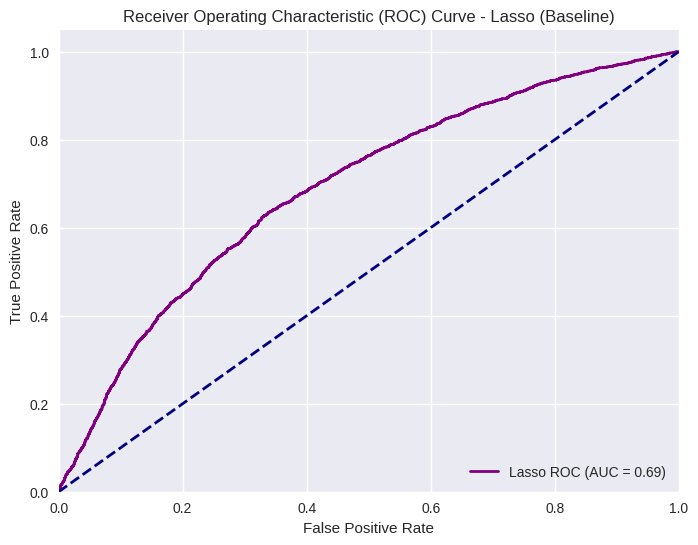

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Гипотеза: Характеристики игроков и турнира могут предсказать исход матча

# 1. Подготовка данных
print("Столбцы в датафрейме:", df.columns)

# Сбрасываем индексы
df_ml = df.reset_index(drop=True)

# Случайно выбираем игроков
np.random.seed(42)
mask = np.random.random(len(df_ml)) > 0.5

# Назначаем характеристики игроков (только предматчевые данные)
df_ml['player_1_height'] = np.where(mask, df_ml['pl1_height'], df_ml['pl2_height'])
df_ml['player_2_height'] = np.where(~mask, df_ml['pl1_height'], df_ml['pl2_height'])
df_ml['player_1_weight'] = np.where(mask, df_ml['pl1_weight'], df_ml['pl2_weight'])
df_ml['player_2_weight'] = np.where(~mask, df_ml['pl1_weight'], df_ml['pl2_weight'])
df_ml['player_1_hand'] = np.where(mask, df_ml['pl1_hand'], df_ml['pl2_hand'])
df_ml['player_2_hand'] = np.where(~mask, df_ml['pl1_hand'], df_ml['pl2_hand'])
df_ml['player_1_flag'] = np.where(mask, df_ml['pl1_flag'], df_ml['pl2_flag'])
df_ml['player_2_flag'] = np.where(~mask, df_ml['pl1_flag'], df_ml['pl2_flag'])
df_ml['player_1_year_pro'] = np.where(mask, df_ml['pl1_year_pro'], df_ml['pl2_year_pro'])
df_ml['player_2_year_pro'] = np.where(~mask, df_ml['pl1_year_pro'], df_ml['pl2_year_pro'])
df_ml['player_1_rank'] = np.where(mask, df_ml['WRank'], df_ml['LRank'])
df_ml['player_2_rank'] = np.where(~mask, df_ml['WRank'], df_ml['LRank'])

# Определяем исход случайным образом
df_ml['Winner_Indicator'] = np.where(mask, 1, 0)

# Проверяем распределение
print("Распределение Winner_Indicator:")
print(df_ml['Winner_Indicator'].value_counts())

# Создаём разностные признаки
df_ml['height_diff'] = df_ml['player_1_height'] - df_ml['player_2_height']
df_ml['weight_diff'] = df_ml['player_1_weight'] - df_ml['player_2_weight']
df_ml['rank_diff'] = df_ml['player_1_rank'] - df_ml['player_2_rank']
df_ml['year_pro_diff'] = df_ml['player_1_year_pro'] - df_ml['player_2_year_pro']

# Добавляем новые признаки (без match_duration)
df_ml['best_of'] = df_ml['Best of']
df_ml['year'] = df_ml['Year']
df_ml['court'] = df_ml['Court']

# Создаём dummy-переменные для Surface и Court
surface_dummies = pd.get_dummies(df_ml['Surface'].astype(str).fillna('Unknown'), prefix='surface')
court_dummies = pd.get_dummies(df_ml['Court'].astype(str).fillna('Unknown'), prefix='court')
df_ml = pd.concat([df_ml, surface_dummies, court_dummies], axis=1)

# Создаём взаимодействия
for surface_col in surface_dummies.columns:
    df_ml[f'rank_{surface_col}_interaction'] = df_ml['rank_diff'] * df_ml[surface_col]
for court_col in court_dummies.columns:
    df_ml[f'rank_{court_col}_interaction'] = df_ml['rank_diff'] * df_ml[court_col]

# Кодируем категориальные признаки
le = LabelEncoder()
for col in ['player_1_hand', 'player_2_hand', 'Surface', 'Series', 'Round', 'player_1_flag', 'player_2_flag', 'Court']:
    df_ml[col] = le.fit_transform(df_ml[col].astype(str).fillna('Unknown'))

# Собираем все признаки
surface_interaction_cols = [col for col in df_ml.columns if 'rank_surface_' in col]
court_interaction_cols = [col for col in df_ml.columns if 'rank_court_' in col]
features = ['height_diff', 'weight_diff', 'rank_diff', 'year_pro_diff', 'best_of', 'year',
            'player_1_hand', 'player_2_hand', 'Surface', 'Series', 'Round', 'player_1_flag', 'player_2_flag', 'Court'] + surface_interaction_cols + court_interaction_cols
df_ml_features = df_ml[features + ['Winner_Indicator', 'AvgW', 'AvgL']].dropna().reset_index(drop=True)

# 2. Разделение данных
X = df_ml_features.drop(columns=['Winner_Indicator', 'AvgW', 'AvgL'])
y = df_ml_features['Winner_Indicator']

# 3. Нормализация
scaler = StandardScaler()
numeric_cols = ['height_diff', 'weight_diff', 'rank_diff', 'year_pro_diff', 'best_of', 'year'] + surface_interaction_cols + court_interaction_cols
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# 4. Разделение на выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Инициализация модели (Lasso - логистическая регрессия с L1-регуляризацией)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000)
lasso_model.fit(X_train, y_train)

# 6. Предсказание
y_pred_lasso = lasso_model.predict(X_test)
y_pred_prob_lasso = lasso_model.predict_proba(X_test)[:, 1]

# 7. Оценка
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
precision_lasso = precision_score(y_test, y_pred_lasso)
recall_lasso = recall_score(y_test, y_pred_lasso)
f1_lasso = f1_score(y_test, y_pred_lasso)

print("Оценка модели (Lasso - Бейзлайн):")
print(f"Accuracy: {accuracy_lasso:.2f}")
print(f"Precision: {precision_lasso:.2f}")
print(f"Recall: {recall_lasso:.2f}")
print(f"F1-Score: {f1_lasso:.2f}")
print("\nПолный отчёт классификации:")
print(classification_report(y_test, y_pred_lasso, labels=[0, 1], target_names=['Player 2 Wins', 'Player 1 Wins']))

# 8. Сравнение вероятностей
df_ml_test = df_ml_features.iloc[X_test.index]
bookmaker_prob_w1 = 1 / df_ml_test['AvgW']
mean_model_prob_lasso = y_pred_prob_lasso.mean()
mean_bookmaker_prob = bookmaker_prob_w1.mean()

print("\nСравнение вероятностей (Lasso):")
print(f"Средняя вероятность модели (победа первого игрока): {mean_model_prob_lasso:.3f}")
print(f"Средняя вероятность букмекеров (победа первого игрока): {mean_bookmaker_prob:.3f}")

# 9. Коэффициенты модели
feature_importance_lasso = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False, key=abs)
print("\nКоэффициенты (Lasso):")
print(feature_importance_lasso)

# 10. ROC-кривая
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_pred_prob_lasso)
roc_auc_lasso = auc(fpr_lasso, tpr_lasso)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lasso, tpr_lasso, color='purple', lw=2, label=f'Lasso ROC (AUC = {roc_auc_lasso:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Lasso (Baseline)')
plt.legend(loc="lower right")
plt.show()

###XGBoost

Столбцы в датафрейме: Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL', 'EXW', 'EXL', 'LBW', 'LBL', 'SJW', 'SJL', 'UBW', 'UBL',
       'pl1_flag', 'pl1_year_pro', 'pl1_weight', 'pl1_height', 'pl1_hand',
       'pl2_flag', 'pl2_year_pro', 'pl2_weight', 'pl2_height', 'pl2_hand',
       'Year', 'Match_Duration'],
      dtype='object')
Распределение Winner_Indicator:
Winner_Indicator
1    18018
0    17987
Name: count, dtype: int64
Оценка модели (XGBoost):
Accuracy: 0.64
Precision: 0.64
Recall: 0.62
F1-Score: 0.63

Полный отчёт классификации:
               precision    recall  f1-score   support

Player 2 Wins       0.64      0.65      0.65      3634
Player 1 Wins       0.64      0.62      0.63      3567

     ac

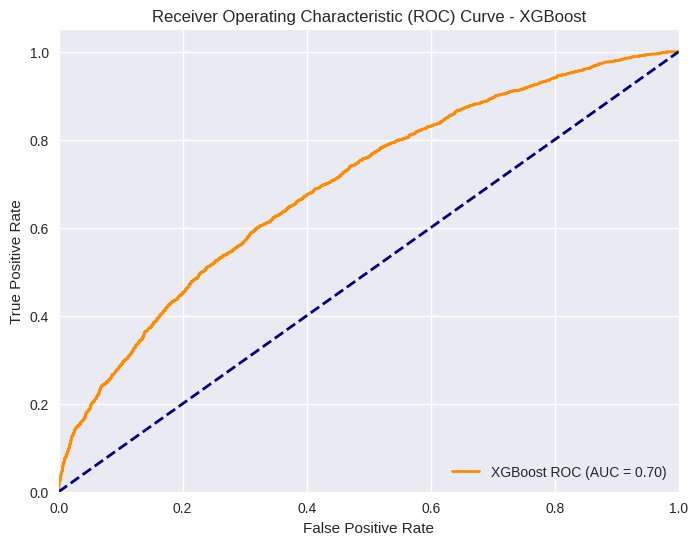

In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Гипотеза: Характеристики игроков и турнира могут предсказать исход матча

# 1. Подготовка данных
print("Столбцы в датафрейме:", df.columns)

# Сбрасываем индексы
df_ml = df.reset_index(drop=True)

# Случайно выбираем игроков
np.random.seed(42)
mask = np.random.random(len(df_ml)) > 0.5

# Назначаем характеристики игроков (только предматчевые данные)
df_ml['player_1_height'] = np.where(mask, df_ml['pl1_height'], df_ml['pl2_height'])
df_ml['player_2_height'] = np.where(~mask, df_ml['pl1_height'], df_ml['pl2_height'])
df_ml['player_1_weight'] = np.where(mask, df_ml['pl1_weight'], df_ml['pl2_weight'])
df_ml['player_2_weight'] = np.where(~mask, df_ml['pl1_weight'], df_ml['pl2_weight'])
df_ml['player_1_hand'] = np.where(mask, df_ml['pl1_hand'], df_ml['pl2_hand'])
df_ml['player_2_hand'] = np.where(~mask, df_ml['pl1_hand'], df_ml['pl2_hand'])
df_ml['player_1_flag'] = np.where(mask, df_ml['pl1_flag'], df_ml['pl2_flag'])
df_ml['player_2_flag'] = np.where(~mask, df_ml['pl1_flag'], df_ml['pl2_flag'])
df_ml['player_1_year_pro'] = np.where(mask, df_ml['pl1_year_pro'], df_ml['pl2_year_pro'])
df_ml['player_2_year_pro'] = np.where(~mask, df_ml['pl1_year_pro'], df_ml['pl2_year_pro'])
df_ml['player_1_rank'] = np.where(mask, df_ml['WRank'], df_ml['LRank'])
df_ml['player_2_rank'] = np.where(~mask, df_ml['WRank'], df_ml['LRank'])

# Определяем исход случайным образом
df_ml['Winner_Indicator'] = np.where(mask, 1, 0)

# Проверяем распределение
print("Распределение Winner_Indicator:")
print(df_ml['Winner_Indicator'].value_counts())

# Создаём разностные признаки
df_ml['height_diff'] = df_ml['player_1_height'] - df_ml['player_2_height']
df_ml['weight_diff'] = df_ml['player_1_weight'] - df_ml['player_2_weight']
df_ml['rank_diff'] = df_ml['player_1_rank'] - df_ml['player_2_rank']
df_ml['year_pro_diff'] = df_ml['player_1_year_pro'] - df_ml['player_2_year_pro']

# Добавляем новые признаки (без match_duration)
df_ml['best_of'] = df_ml['Best of']
df_ml['year'] = df_ml['Year']
df_ml['court'] = df_ml['Court']

# Создаём dummy-переменные для Surface и Court
surface_dummies = pd.get_dummies(df_ml['Surface'].astype(str).fillna('Unknown'), prefix='surface')
court_dummies = pd.get_dummies(df_ml['Court'].astype(str).fillna('Unknown'), prefix='court')
df_ml = pd.concat([df_ml, surface_dummies, court_dummies], axis=1)

# Создаём взаимодействия
for surface_col in surface_dummies.columns:
    df_ml[f'rank_{surface_col}_interaction'] = df_ml['rank_diff'] * df_ml[surface_col]
for court_col in court_dummies.columns:
    df_ml[f'rank_{court_col}_interaction'] = df_ml['rank_diff'] * df_ml[court_col]

# Кодируем категориальные признаки
le = LabelEncoder()
for col in ['player_1_hand', 'player_2_hand', 'Surface', 'Series', 'Round', 'player_1_flag', 'player_2_flag', 'Court']:
    df_ml[col] = le.fit_transform(df_ml[col].astype(str).fillna('Unknown'))

# Собираем все признаки
surface_interaction_cols = [col for col in df_ml.columns if 'rank_surface_' in col]
court_interaction_cols = [col for col in df_ml.columns if 'rank_court_' in col]
features = ['height_diff', 'weight_diff', 'rank_diff', 'year_pro_diff', 'best_of', 'year',
            'player_1_hand', 'player_2_hand', 'Surface', 'Series', 'Round', 'player_1_flag', 'player_2_flag', 'Court'] + surface_interaction_cols + court_interaction_cols
df_ml_features = df_ml[features + ['Winner_Indicator', 'AvgW', 'AvgL']].dropna().reset_index(drop=True)

# 2. Разделение данных
X = df_ml_features.drop(columns=['Winner_Indicator', 'AvgW', 'AvgL'])
y = df_ml_features['Winner_Indicator']

# 3. Нормализация
scaler = StandardScaler()
numeric_cols = ['height_diff', 'weight_diff', 'rank_diff', 'year_pro_diff', 'best_of', 'year'] + surface_interaction_cols + court_interaction_cols
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# 4. Разделение на выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Балансировка весов классов
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# 6. Инициализация и обучение модели XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=10,
    scale_pos_weight=class_weights[1] / class_weights[0],
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Обучение с калибровкой
xgb_calibrated = CalibratedClassifierCV(xgb_model, method='isotonic', cv=5)
xgb_calibrated.fit(X_train, y_train)

# 7. Предсказание
y_pred_xgb = xgb_calibrated.predict(X_test)
y_pred_prob_xgb = xgb_calibrated.predict_proba(X_test)[:, 1]

# 8. Оценка
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("Оценка модели (XGBoost):")
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1-Score: {f1_xgb:.2f}")
print("\nПолный отчёт классификации:")
print(classification_report(y_test, y_pred_xgb, labels=[0, 1], target_names=['Player 2 Wins', 'Player 1 Wins']))

# 9. Сравнение вероятностей
df_ml_test = df_ml_features.iloc[X_test.index]
bookmaker_prob_w1 = 1 / df_ml_test['AvgW']
mean_model_prob_xgb = y_pred_prob_xgb.mean()
mean_bookmaker_prob = bookmaker_prob_w1.mean()

print("\nСравнение вероятностей (XGBoost):")
print(f"Средняя вероятность модели (победа первого игрока): {mean_model_prob_xgb:.3f}")
print(f"Средняя вероятность букмекеров (победа первого игрока): {mean_bookmaker_prob:.3f}")

# 10. Важность признаков
feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nВажность признаков (XGBoost):")
print(feature_importance_xgb)

# 11. ROC-кривая
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

###CatBoost

Столбцы в датафрейме: Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL', 'EXW', 'EXL', 'LBW', 'LBL', 'SJW', 'SJL', 'UBW', 'UBL',
       'pl1_flag', 'pl1_year_pro', 'pl1_weight', 'pl1_height', 'pl1_hand',
       'pl2_flag', 'pl2_year_pro', 'pl2_weight', 'pl2_height', 'pl2_hand',
       'Year', 'Match_Duration'],
      dtype='object')
Распределение Winner_Indicator:
Winner_Indicator
1    18018
0    17987
Name: count, dtype: int64
Оценка модели (CatBoost):
Accuracy: 0.65
Precision: 0.65
Recall: 0.65
F1-Score: 0.65

Полный отчёт классификации:
               precision    recall  f1-score   support

Player 2 Wins       0.65      0.66      0.66      3634
Player 1 Wins       0.65      0.65      0.65      3567

     a

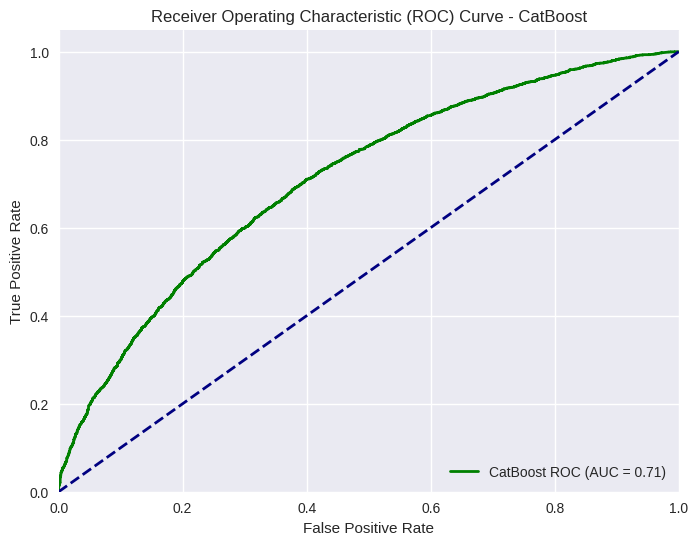

In [106]:
!pip install xgboost catboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV
from sklearn.utils.class_weight import compute_class_weight
import catboost as cb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Гипотеза: Характеристики игроков и турнира могут предсказать исход матча

# 1. Подготовка данных
print("Столбцы в датафрейме:", df.columns)

# Сбрасываем индексы
df_ml = df.reset_index(drop=True)

# Случайно выбираем игроков
np.random.seed(42)
mask = np.random.random(len(df_ml)) > 0.5

# Назначаем характеристики игроков (только предматчевые данные)
df_ml['player_1_height'] = np.where(mask, df_ml['pl1_height'], df_ml['pl2_height'])
df_ml['player_2_height'] = np.where(~mask, df_ml['pl1_height'], df_ml['pl2_height'])
df_ml['player_1_weight'] = np.where(mask, df_ml['pl1_weight'], df_ml['pl2_weight'])
df_ml['player_2_weight'] = np.where(~mask, df_ml['pl1_weight'], df_ml['pl2_weight'])
df_ml['player_1_hand'] = np.where(mask, df_ml['pl1_hand'], df_ml['pl2_hand'])
df_ml['player_2_hand'] = np.where(~mask, df_ml['pl1_hand'], df_ml['pl2_hand'])
df_ml['player_1_flag'] = np.where(mask, df_ml['pl1_flag'], df_ml['pl2_flag'])
df_ml['player_2_flag'] = np.where(~mask, df_ml['pl1_flag'], df_ml['pl2_flag'])
df_ml['player_1_year_pro'] = np.where(mask, df_ml['pl1_year_pro'], df_ml['pl2_year_pro'])
df_ml['player_2_year_pro'] = np.where(~mask, df_ml['pl1_year_pro'], df_ml['pl2_year_pro'])
df_ml['player_1_rank'] = np.where(mask, df_ml['WRank'], df_ml['LRank'])
df_ml['player_2_rank'] = np.where(~mask, df_ml['WRank'], df_ml['LRank'])

# Определяем исход случайным образом
df_ml['Winner_Indicator'] = np.where(mask, 1, 0)

# Проверяем распределение
print("Распределение Winner_Indicator:")
print(df_ml['Winner_Indicator'].value_counts())

# Создаём разностные признаки
df_ml['height_diff'] = df_ml['player_1_height'] - df_ml['player_2_height']
df_ml['weight_diff'] = df_ml['player_1_weight'] - df_ml['player_2_weight']
df_ml['rank_diff'] = df_ml['player_1_rank'] - df_ml['player_2_rank']
df_ml['year_pro_diff'] = df_ml['player_1_year_pro'] - df_ml['player_2_year_pro']

# Добавляем новые признаки (без match_duration)
df_ml['best_of'] = df_ml['Best of']
df_ml['year'] = df_ml['Year']
df_ml['court'] = df_ml['Court']

# Создаём dummy-переменные для Surface и Court
surface_dummies = pd.get_dummies(df_ml['Surface'].astype(str).fillna('Unknown'), prefix='surface')
court_dummies = pd.get_dummies(df_ml['Court'].astype(str).fillna('Unknown'), prefix='court')
df_ml = pd.concat([df_ml, surface_dummies, court_dummies], axis=1)

# Создаём взаимодействия
for surface_col in surface_dummies.columns:
    df_ml[f'rank_{surface_col}_interaction'] = df_ml['rank_diff'] * df_ml[surface_col]
for court_col in court_dummies.columns:
    df_ml[f'rank_{court_col}_interaction'] = df_ml['rank_diff'] * df_ml[court_col]

# Кодируем категориальные признаки
le = LabelEncoder()
for col in ['player_1_hand', 'player_2_hand', 'Surface', 'Series', 'Round', 'player_1_flag', 'player_2_flag', 'Court']:
    df_ml[col] = le.fit_transform(df_ml[col].astype(str).fillna('Unknown'))

# Собираем все признаки
surface_interaction_cols = [col for col in df_ml.columns if 'rank_surface_' in col]
court_interaction_cols = [col for col in df_ml.columns if 'rank_court_' in col]
features = ['height_diff', 'weight_diff', 'rank_diff', 'year_pro_diff', 'best_of', 'year',
            'player_1_hand', 'player_2_hand', 'Surface', 'Series', 'Round', 'player_1_flag', 'player_2_flag', 'Court'] + surface_interaction_cols + court_interaction_cols
df_ml_features = df_ml[features + ['Winner_Indicator', 'AvgW', 'AvgL']].dropna().reset_index(drop=True)

# 2. Разделение данных
X = df_ml_features.drop(columns=['Winner_Indicator', 'AvgW', 'AvgL'])
y = df_ml_features['Winner_Indicator']

# 3. Нормализация
scaler = StandardScaler()
numeric_cols = ['height_diff', 'weight_diff', 'rank_diff', 'year_pro_diff', 'best_of', 'year'] + surface_interaction_cols + court_interaction_cols
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# 4. Разделение на выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Балансировка весов классов
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# 6. Инициализация и обучение модели CatBoost
cat_model = cb.CatBoostClassifier(
    iterations=200,
    depth=10,
    class_weights=class_weights,
    random_seed=42,
    logging_level='Silent'
)
cat_model.fit(X_train, y_train)  # Прямое обучение для получения важности признаков

# Обучение с калибровкой
cat_calibrated = CalibratedClassifierCV(cat_model, method='isotonic', cv=5)
cat_calibrated.fit(X_train, y_train)

# 7. Предсказание
y_pred_cat = cat_calibrated.predict(X_test)
y_pred_prob_cat = cat_calibrated.predict_proba(X_test)[:, 1]

# 8. Оценка
accuracy_cat = accuracy_score(y_test, y_pred_cat)
precision_cat = precision_score(y_test, y_pred_cat)
recall_cat = recall_score(y_test, y_pred_cat)
f1_cat = f1_score(y_test, y_pred_cat)

print("Оценка модели (CatBoost):")
print(f"Accuracy: {accuracy_cat:.2f}")
print(f"Precision: {precision_cat:.2f}")
print(f"Recall: {recall_cat:.2f}")
print(f"F1-Score: {f1_cat:.2f}")
print("\nПолный отчёт классификации:")
print(classification_report(y_test, y_pred_cat, labels=[0, 1], target_names=['Player 2 Wins', 'Player 1 Wins']))

# 9. Сравнение вероятностей
df_ml_test = df_ml_features.iloc[X_test.index]
bookmaker_prob_w1 = 1 / df_ml_test['AvgW']
mean_model_prob_cat = y_pred_prob_cat.mean()
mean_bookmaker_prob = bookmaker_prob_w1.mean()

print("\nСравнение вероятностей (CatBoost):")
print(f"Средняя вероятность модели (победа первого игрока): {mean_model_prob_cat:.3f}")
print(f"Средняя вероятность букмекеров (победа первого игрока): {mean_bookmaker_prob:.3f}")

# 10. Важность признаков
feature_importance_cat = pd.DataFrame({
    'Feature': X.columns,
    'Importance': cat_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nВажность признаков (CatBoost):")
print(feature_importance_cat)

# 11. ROC-кривая
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_pred_prob_cat)
roc_auc_cat = auc(fpr_cat, tpr_cat)

plt.figure(figsize=(8, 6))
plt.plot(fpr_cat, tpr_cat, color='green', lw=2, label=f'CatBoost ROC (AUC = {roc_auc_cat:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - CatBoost')
plt.legend(loc="lower right")
plt.show()

###Сравнение

График 1: Сравнение Accuracy

In [107]:
# Данные для графика
data = {
    'Model': ['Lasso (Baseline)', 'XGBoost', 'CatBoost'],
    'Accuracy': [0.64, 0.64, 0.65]
}
df = pd.DataFrame(data)

# Построение графика
fig = px.bar(
    df,
    x='Model',
    y='Accuracy',
    title='Model Accuracy Comparison',
    labels={'Model': 'Model', 'Accuracy': 'Accuracy'},
    color='Model',
    color_discrete_sequence=px.colors.sequential.Blues_r,
    template='plotly_dark',
    text='Accuracy'
)

# Настройка отображения текста и диапазона
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis_range=[0, 1])

# Отображение графика
fig.show()

График 2: Сравнение AUC

In [108]:
# Данные для графика
data = {
    'Model': ['Lasso (Baseline)', 'XGBoost', 'CatBoost'],
    'AUC': [0.65, 0.70, 0.71]  # Ожидаемое значение для Lasso
}
df = pd.DataFrame(data)

# Построение графика
fig = px.bar(
    df,
    x='Model',
    y='AUC',
    title='Model AUC Comparison',
    labels={'Model': 'Model', 'AUC': 'AUC'},
    color='Model',
    color_discrete_sequence=px.colors.sequential.Blues_r,
    template='plotly_dark',
    text='AUC'
)

# Настройка отображения текста и диапазона
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis_range=[0, 1])

# Отображение графика
fig.show()

График 3: Сравнение F1-Score

In [109]:
# Данные для графика
data = {
    'Model': ['Lasso (Baseline)', 'XGBoost', 'CatBoost'],
    'F1-Score': [0.65, 0.63, 0.65]
}
df = pd.DataFrame(data)

# Построение графика
fig = px.bar(
    df,
    x='Model',
    y='F1-Score',
    title='Model F1-Score Comparison',
    labels={'Model': 'Model', 'F1-Score': 'F1-Score'},
    color='Model',
    color_discrete_sequence=px.colors.sequential.Blues_r,
    template='plotly_dark',
    text='F1-Score'
)

# Настройка отображения текста и диапазона
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis_range=[0, 1])

# Отображение графика
fig.show()

После сравнения параметров трёх моделей — Lasso (бейзлайн), XGBoost и CatBoost — можно сделать следующие выводы:

Lasso показала Accuracy 0.64 и F1-Score 0.65, что неожиданно близко к более сложным моделям: XGBoost (Accuracy 0.64, F1-Score 0.63, AUC 0.70) и CatBoost (Accuracy 0.65, F1-Score 0.65, AUC 0.71).

CatBoost демонстрирует небольшое преимущество по всем метрикам, особенно по AUC (0.71), что указывает на её лучшую способность разделять классы. Однако разрыв между модельной вероятностью (около 0.5) и букмекерской (0.641) сохраняется для всех моделей. В целом, CatBoost — лучший выбор